# My validation
This note contains a set of different plots to explore the output of my_core_13 running on DISPATCH

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')
import tqdm


import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa


sys.path.append('my_funcs/')
from plot_funcs import plot_density, plot_velocity

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


In [2]:
sn = dis.snapshot(159, 'sink6amr01')
sn.sinks.keys()

dict_keys([])

In [10]:
sn = dis.snapshot(177, 'sink13core02')
sn.sinks.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [4]:
sn.sinks_ids

AttributeError: 'snapshot' object has no attribute 'sinks_ids'

In [23]:
sn_223 = dis.snapshot(223,'my_core_sink82')
sn_last = dis.snapshot(375,'my_core_sink82')

sn_last = dis.snapshot(392, '', data = '/groups/astro/kxm508/codes/dispatch2/experiments/christian/sink_162/data_dispatch/')

In [3]:
(sn_last.time - sn_223.time) * sn_223.scaling.t / sn_223.cgs.yr

638467.2679005519

In [4]:
sn = sn_last
sn_last.sinks.keys()


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161])

In [19]:
sn_last.sinks[79][0].mass * sn_last.scaling.m / sn_last.cgs.m_sun

0.11332108569948858

In [22]:
#Going from snap: 223 til 380 this cell takes ~ 3min
# Create directory containing the snapshots
snaps = {}

i_snap = 269; f_snap = 269 + 1
for io in range(i_snap, f_snap):
    sn_269 = dis.snapshot(io,'my_core_sink82')
    cgs_time = sn.scaling.t / sn.cgs.yr
    snaps[io] = sn
    print(io, f'{sn.time * cgs_time:3.0f} yr')

269 23704135 yr


In [7]:
sn_269.sinks[79][0].position

array([-0.22864257,  0.09162241, -0.16226262])

In [8]:
star_pos = sn.sinks[13][0].position
for p in tqdm.tqdm(sn.patches): # Should take 3s to loop over the patches like this
    XX, YY, ZZ = np.meshgrid(p.xi, p.yi, p.zi, indexing='ij')
    p.xyz = np.array([XX, YY, ZZ]); 
    p.rel_xyz = p.xyz - star_pos[:, None, None, None]
    p.dist_xyz = np.linalg.norm(p.rel_xyz, axis = 0) 
    p.vel_xyz = np.asarray([p.var('ux'), p.var('uy'), p.var('uz')]) 
    p.m = p.var('d') * np.prod(p.ds) 

  0%|          | 0/5827 [00:00<?, ?it/s]

100%|██████████| 5827/5827 [00:16<00:00, 352.01it/s]


In [ ]:
#Placement of forming sink
sn = snaps[f_snap - 1]
sns = sn.statobj('d')

In [ ]:
for p in sn.patches:
    if p.level == 20:
        break

print(f'Size of smallest patch: {p.size[0] * sn.scaling.l / sn.cgs.au:2.4f} AU')
print(f'Size of smallest cell: {p.ds[0] * sn.scaling.l / sn.cgs.au:2.4f} AU') # So the resolution in this simulation is to coarse to show a disk, what level should we use?
p.size[0] / p.ds[0] # Each patch i made up by 16*16*16 cells. Hence the size is 16 times bigger than the cellsize (Hence deistance between each datapoint).

Size of smallest patch: 12.5905 AU
Size of smallest cell: 0.7869 AU


16.0

In [ ]:
for p in sn.patches:
    if p.level == 1:
        break

print(f'Size of biggest patch: {p.size[0] * sn.scaling.l / sn.cgs.au:2.4f} AU')
print(f'Size of biggest cell: {p.ds[0] * sn.scaling.l / sn.cgs.au:2.4f} AU') # So the resolution in this simulation is to coarse to show a disk, what level should we use?

Size of biggest patch: 25785.4278 AU
Size of biggest cell: 1611.5892 AU


In [ ]:
for p in sn.patches:
    if p.id == 1:
        break
print(p.extent, p.size[0], p.ds, p.position)
print(dir(p))

[[0.46875 0.5     0.25    0.28125]
 [0.09375 0.125   0.25    0.28125]
 [0.09375 0.125   0.46875 0.5    ]] 0.03125 [0.00195312 0.00195312 0.00195312] [0.109375 0.484375 0.265625]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_h', 'all_keys', 'aux', 'box', 'cache', 'centre_nat', 'contains', 'data', 'dist_xyz', 'ds', 'dtime', 'eos_name', 'erot1', 'erot2', 'erot3', 'etype', 'extent', 'filename', 'gamma', 'geometric_factors', 'gn', 'guard_zones', 'id', 'idx', 'indices', 'ioformat', 'iout', 'ip', 'istep', 'keys', 'kind', 'level', 'li', 'llc_cart', 'llc_nat', 'm', 'memmap', 'mesh_type', 'mpi_dims', 'mpi_size', 'mv', 'n', 'nbor_ids', 'ncell', 'ng', 'no_mans_land', 'nt', 'ntotal', 'nv', 'offset', 'om

# Density

In [64]:
lmax = 20
ds = 0.5**lmax
w = np.round(2000 / 1.5).astype(int)
size = w * ds
extent = size * sn.scaling.l / sn.cgs.au; print(extent,'AU')
cgs_time = sn.scaling.t / sn.cgs.yr
cgs_density = sn.scaling.d / 0.001; print(cgs_density)
cgs_length = sn.scaling.l / sn.cgs.au
print(sn.scaling.d), print( (sn.scaling.m) / (sn.scaling.l)**3 )
print(sn.time *cgs_time)

1048.949440532827 AU
3.187e-18
3.187e-21
3.187e-21
23704135.18743795


In [53]:
ramses_pos = np.array([0.22130730, 0.061598696, 0.025191988])

In [54]:
star_pos, ramses_pos - 0.5

(array([-0.27881622, -0.43349457, -0.47727203]),
 array([-0.2786927 , -0.4384013 , -0.47480801]))

In [65]:
ρ = dse.amr2raw(sn, center = ramses_pos - 0.5, width = w, verbose = 0, lmax = lmax, lmin = 12, ivs = 'd')

In [67]:
2000//1.5

1333.0

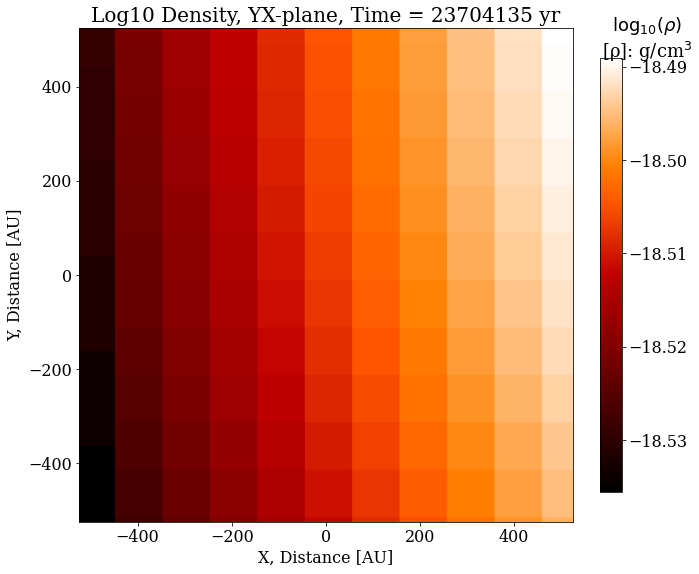

In [66]:
plot_density(ρ, snapshot = sn, width = w, axis = 2, hide_ticks=False, lmax = lmax)


### AMR_plane

In [33]:
pp = [p.position for p in sn_last.patches if p.level == 20]
np.median(pp, axis = 0)

array([-0.27881622, -0.43349457, -0.47727203])

In [34]:
#star_pos = sn.sinks[13][0].position
star_pos = np.median(pp, axis = 0)
print(abs(star_pos))
dist_to_box = np.asarray(sn.box) / 2 - abs(star_pos); print(dist_to_box)
print(f'Shortest distances to box:',[ np.round(dist * cgs_length) for dist in dist_to_box],'au')

[0.27881622 0.43349457 0.47727203]
[0.22118378 0.06650543 0.02272797]
Shortest distances to box: [182506.0, 54876.0, 18754.0] au


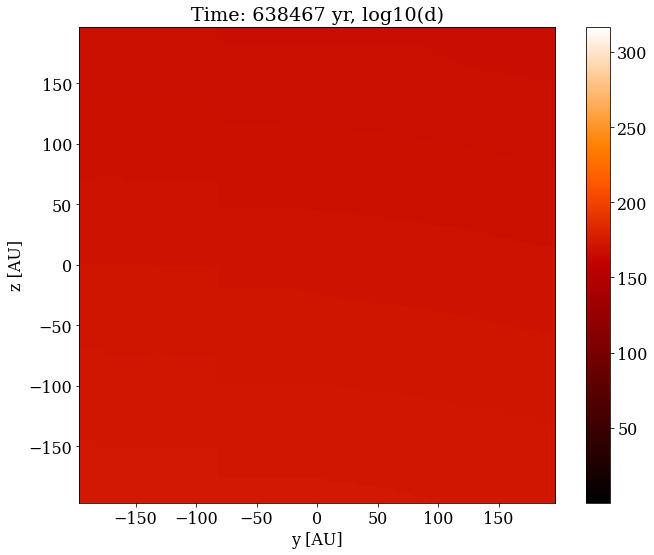

In [35]:
plt.figure(figsize = (10,8))
npix=500; w_amrplane = npix *0.5**20


plt.subplot(1,1,1); dgr.amr_plane(sn,'d',center=star_pos,width=w_amrplane, mesh=0,ident=0,title=f'Time: {(sn.time - sn_223.time) * cgs_time:4.0f} yr, log10(d)', to = 'au', axis = 0, cmap = 'gist_heat') ;
#plt.subplot(1,3,2); dgr.amr_plane(sn,'uy',center=star_pos,width=w,mesh=True,title='                   Uy',ident=0, to = 'au', axis = 0)
#plt.subplot(1,3,3); dgr.amr_plane(sn,'uz',center=star_pos,width=w,mesh=True,title='                   Uz', to = 'au', axis = 0)

### AMR2raw

In [10]:
sn.n[0]

16

In [11]:
star_pos

array([-0.27881622, -0.43349457, -0.47727203])

In [13]:
ρ.shape

(2000, 2000, 2000)

/tmp/ipykernel_1323928/1724838244.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(ρ.sum(axis=2)))


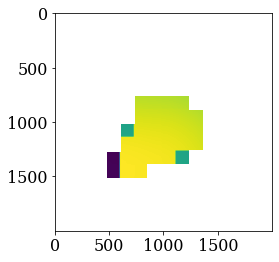

In [17]:
plt.imshow(np.log10(ρ.sum(axis=2)))

/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/my_funcs/plot_funcs.py:18: RuntimeWarning: divide by zero encountered in log10
  plot_data_d = np.log10(np.take(dens_data * cgs_density, np.shape(dens_data)[axis] // 2, axis=axis)).transpose()


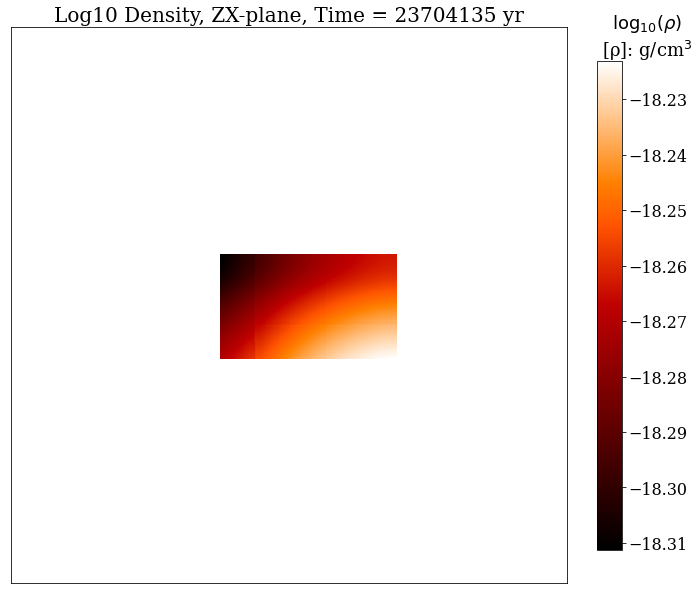

In [15]:
plot_density(ρ, snapshot = sn, width = w, axis = 1)


# Velocity

In [ ]:
ux =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 0, lmax = 20, lmin = 15, ivs = 'ux')
uy =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 0, lmax = 20, lmin = 15, ivs = 'uy')
uz =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 0, lmax = 20, lmin = 15, ivs = 'uz')

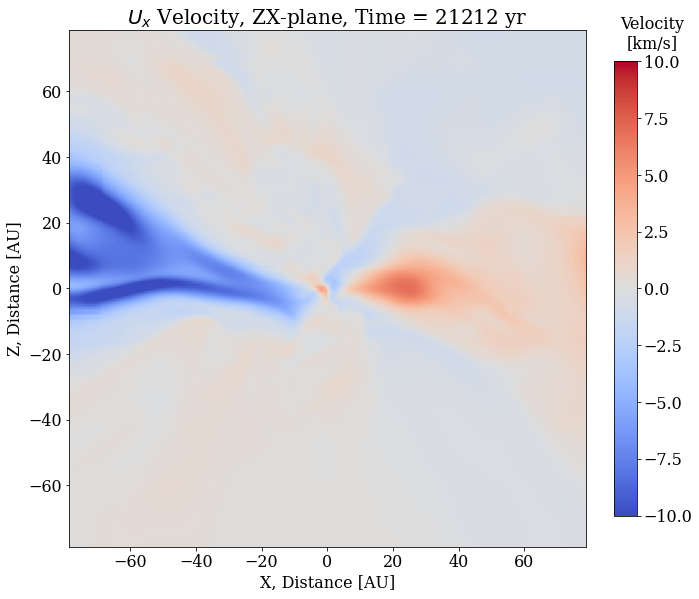

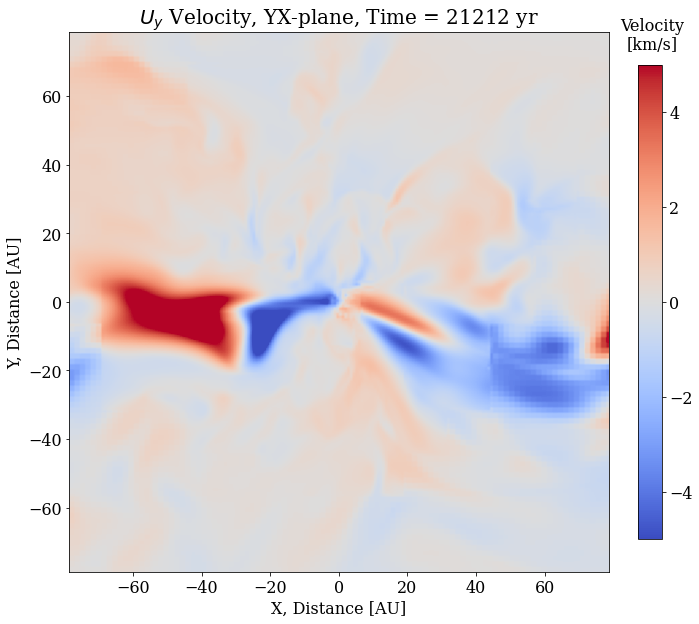

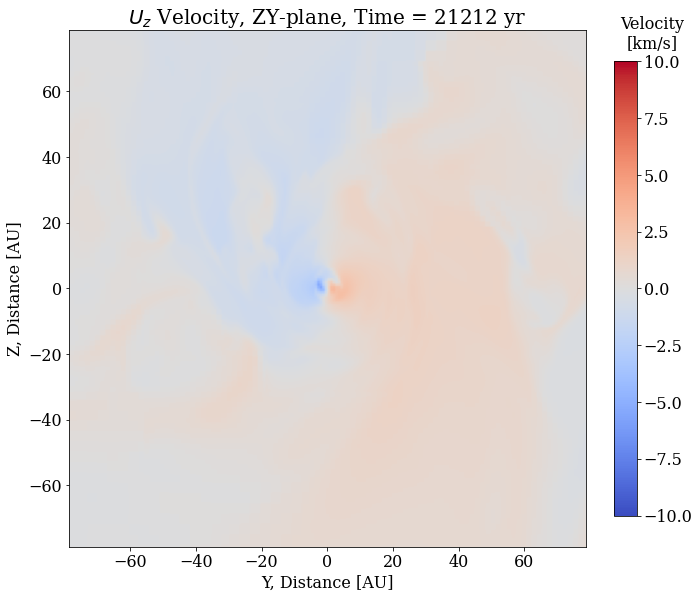

In [ ]:
plot_velocity(ux, snapshot=sn, width = w, axis = 1, add_title='$U_x$ ', colorbar_lim=10)
plot_velocity(uy, snapshot=sn, width = w, axis = 2, add_title='$U_y$ ', colorbar_lim=5)
plot_velocity(uz, snapshot=sn, width = w, axis = 0, add_title='$U_z$ ', colorbar_lim=10)

## Mass of the sink

In [ ]:
scaling_msun = sn.scaling.m / sn.cgs.m_sun
scaling_yr = sn.scaling.t / sn.cgs.yr
scaling_dmdt = scaling_msun / scaling_yr

In [ ]:
t_eval = []
mass_13 = []
for i in tqdm.tqdm(range(i_snap, f_snap)):
    try:
        t_eval.append(snaps[i].sinks[13][0].time)
        mass_13.append(snaps[i].sinks[13][0].mass)
        for j in range(1, len(snaps[i].sinks[13])):
            if all(t_eval != snaps[i].sinks[13][j].time): 
            #if not np.allclose(t_eval, snaps[i].sinks[13][j].time, atol = 1e-8, rtol = 0):     
                t_eval.append(snaps[i].sinks[13][j].time)
                mass_13.append(snaps[i].sinks[13][j].mass)
            else:
                continue
    except:
        pass
t_eval = np.asarray(t_eval); mass_13 = np.asarray(mass_13)
t_eval

100%|██████████| 488/488 [00:00<00:00, 99047.68it/s]


array([4.80000000e-06, 1.49743771e-05, 1.89743771e-05, 2.29743771e-05,
       2.69743771e-05, 3.09743771e-05, 3.97608768e-05, 5.09743771e-05,
       6.29743771e-05, 7.49743771e-05, 8.40809609e-05, 8.70163013e-05,
       9.10163013e-05, 9.50163013e-05, 9.90163013e-05, 1.03016301e-04,
       1.07016301e-04, 1.11016301e-04, 1.15016301e-04, 1.19016301e-04,
       1.23016301e-04, 1.27016301e-04, 1.31016301e-04, 1.35016301e-04,
       1.39016301e-04, 1.47382070e-04, 1.58974377e-04, 1.62980083e-04,
       1.66980083e-04, 1.70980083e-04, 1.74980083e-04, 1.78980083e-04,
       1.82980083e-04, 1.86980083e-04, 1.90980083e-04, 1.94980083e-04,
       1.98980083e-04, 2.07016301e-04, 2.15016301e-04, 2.23362554e-04,
       2.34974377e-04, 2.38980083e-04, 2.42980083e-04, 2.47864117e-04,
       2.58974377e-04, 2.70974377e-04, 2.79016301e-04, 2.83016301e-04,
       2.87016301e-04, 2.91016301e-04, 2.95016301e-04, 2.99016301e-04,
       3.03016301e-04, 3.07016301e-04, 3.11016301e-04, 3.15016301e-04,
      

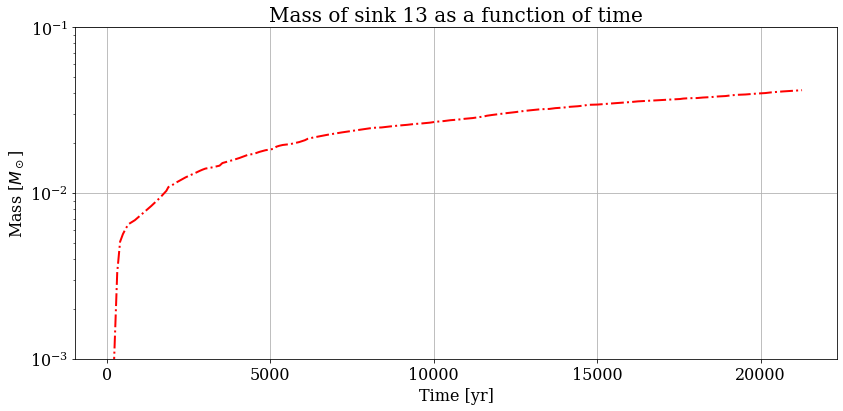

In [ ]:
fig, axs = plt.subplots(figsize = (12,6))
plt.grid()
axs.semilogy(t_eval * scaling_yr, mass_13 * scaling_msun, '-.', lw = 2, c = 'red'); 
axs.set(ylim = (1e-3, 1e-1))
axs.set_xlabel('Time [yr]', fontsize=16); axs.set_ylabel('Mass [$M_\odot$]', fontsize=16); axs.set_title('Mass of sink 13 as a function of time', fontsize = 20)
plt.tight_layout()

In [ ]:
dt = np.diff(t_eval)[0]
dmdt = ((np.roll(mass_13, -1) -np.roll(mass_13, 1)) / (2.0*dt))[1:]
np.unique(np.diff(t_eval), return_counts=True)


(array([2.93534040e-06, 3.79556045e-06, 3.83534068e-06, 3.85649956e-06,
        4.00000000e-06, 4.00000000e-06, 4.00000000e-06, 4.00000000e-06,
        4.00000000e-06, 4.00570631e-06, 4.00570631e-06, 4.41322850e-06,
        4.88403380e-06, 7.32110720e-06, 8.00000000e-06, 8.03621792e-06,
        8.04192423e-06, 8.04192423e-06, 8.08799584e-06, 8.34625300e-06,
        8.36576847e-06, 8.58425337e-06, 8.67889280e-06, 8.67889280e-06,
        8.67889280e-06, 8.67889280e-06, 8.67889280e-06, 8.67889280e-06,
        8.67889280e-06, 8.78649975e-06, 8.82239324e-06, 9.08481794e-06,
        9.10658383e-06, 1.01743771e-05, 1.09151821e-05, 1.11102599e-05,
        1.12135002e-05, 1.13211072e-05, 1.13211072e-05, 1.13211072e-05,
        1.13211072e-05, 1.13211072e-05, 1.13211072e-05, 1.13211072e-05,
        1.14157466e-05, 1.15859430e-05, 1.15923073e-05, 1.16118228e-05,
        1.19120042e-05, 1.19558704e-05, 1.19580758e-05, 1.19580758e-05,
        1.19942937e-05, 1.20000000e-05, 1.20000000e-05, 1.200000

In [ ]:
dmdt * scaling_dmdt

array([ 1.10383892e-05,  5.27310648e-06,  2.32763776e-06,  1.91196570e-06,
        1.69332886e-06,  2.37425826e-06,  3.41038319e-06,  4.09075100e-06,
        4.39259730e-06,  3.43634142e-06,  1.72481210e-06,  1.09980583e-06,
        1.28543203e-06,  1.21583645e-06,  1.22758679e-06,  1.19760573e-06,
        1.08893511e-06,  1.03964825e-06,  9.99554684e-07,  1.06716269e-06,
        1.14238586e-06,  1.09162218e-06,  9.95794994e-07,  9.20788928e-07,
        1.31468602e-06,  2.09294288e-06,  1.59574085e-06,  7.69418465e-07,
        8.02587069e-07,  8.11942717e-07,  8.74865197e-07,  9.22756057e-07,
        1.01704297e-06,  1.13801507e-06,  1.10289438e-06,  9.98921170e-07,
        1.59009907e-06,  2.02533279e-06,  1.72321146e-06,  2.09840318e-06,
        1.82387447e-06,  1.02809063e-06,  1.07036207e-06,  1.80725572e-06,
        2.44123750e-06,  2.14865721e-06,  1.39712218e-06,  8.80215499e-07,
        8.01188355e-07,  7.69623853e-07,  7.57973011e-07,  7.63081558e-07,
        7.59346141e-07,  

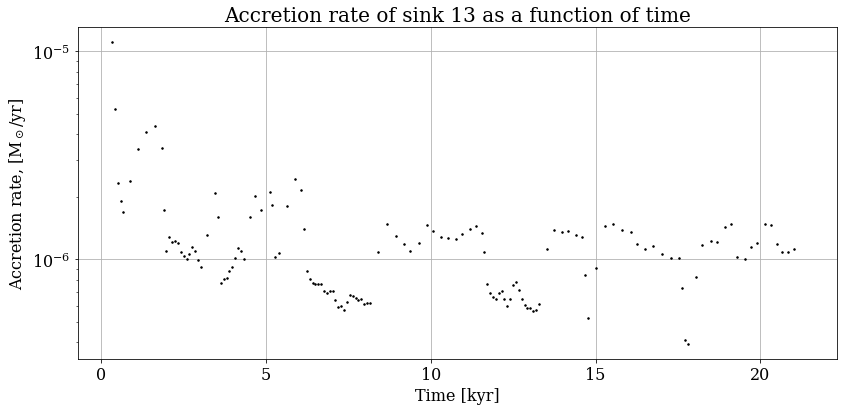

In [ ]:

fig, axs = plt.subplots(figsize = (12,6))
plt.grid()
axs.semilogy(t_eval[1:] * scaling_yr *1e-3, dmdt * scaling_dmdt, '.', markersize = 3, c = 'black'); 

axs.set_xlabel('Time [kyr]', fontsize=16); axs.set_ylabel('Accretion rate, [M$_\odot$/yr]', fontsize=16); axs.set_title('Accretion rate of sink 13 as a function of time', fontsize = 20)

plt.tight_layout()

In [ ]:
p.__dir__()

['id',
 'memmap',
 'ioformat',
 'iout',
 'time',
 'ntotal',
 'box',
 'li',
 'ui',
 'ng',
 'gn',
 'n',
 'nv',
 'mv',
 'nt',
 'gamma',
 'eos_name',
 'opacity',
 'periodic',
 'guard_zones',
 'time_derivs',
 'no_mans_land',
 'omp_nthreads',
 'mpi_size',
 'mesh_type',
 'mpi_dims',
 'refine_ratio',
 'origin',
 'position',
 'size',
 'level',
 'dtime',
 'istep',
 'ds',
 'ncell',
 'velocity',
 'kind',
 'etype',
 'record',
 'rank',
 'centre_nat',
 'llc_nat',
 'erot1',
 'erot2',
 'erot3',
 'parent_id',
 'nbor_ids',
 'idx',
 'extent',
 'llc_cart',
 'filename',
 'offset',
 'ip',
 'var',
 'aux',
 'data',
 'keys',
 'all_keys',
 'x',
 'y',
 'z',
 'xi',
 'yi',
 'zi',
 'xs',
 'ys',
 'zs',
 'xyz',
 'xyzi',
 'geometric_factors',
 'parent',
 'rel_xyz',
 'dist_xyz',
 'vel_xyz',
 'm',
 '__module__',
 '__init__',
 'indices',
 'contains',
 '_h',
 'cache',
 'plane',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__